In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from zipfile import ZipFile

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
#Load data - please don't change this part. 
df = pd.read_csv("Student Performance new.csv")
df.drop(columns={"Unnamed: 0"}, inplace=True)
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


<h1>Part 1: Is There a Significant Difference Between Boys and Girls in Math? (10 pts) </h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion. Use your judgement on what makes a good piece of evidence.

<h2> Answers and Explantion: </h2>
<ul>
<li> The cohen effect size is valued at 0.34, which falls under small in terms of association.
<li>Since the p-value is so small, we have to reject the null hypothesis which means that there is no significant difference between the two sexes.
<li>The tests suggest that there is no signifcant difference between boys and girls in math.
</ul>

In [106]:
def CohenEffectSize(group1, group2):
    """Compute Cohen's d.

    group1: Series or NumPy array
    group2: Series or NumPy array

    returns: float
    """
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

x = CohenEffectSize(df_m["math percentage"], df_f["math percentage"])
print(round(x,2))

0.34


9.120185549328735e-08


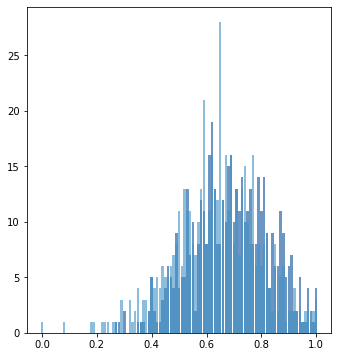

In [58]:
df_m = df[df["sex"]=='M']
df_f = df[df["sex"]=='F']


#Seeing if normal distribution in order to do a t-test
x, y = thinkstats2.Hist(df_m["math percentage"]), thinkstats2.Hist(df_f["math percentage"])
thinkplot.PrePlot(2,1,2)
thinkplot.Hist(x)
thinkplot.Hist(y)

stat, pval = ss.ttest_ind(df_m["math percentage"], df_f["math percentage"])
print(pval)


<h1>Part 2: Is there a difference in math performance depending on Parental Education (15 pts)</h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion.

Answers:

It seemed like there was no difference since the means of each parental level is not too far from the population mean. However, after taking the 2 levels of education farthest from the mean had scores between small to medium, and p values less than 0.05 except for those that had masters. Overall, we can say that the difference is not significant for most except for those that mad master's degree withg a pvalue of 0.07.

In [183]:
grouped_parental = df.groupby(["parental level of education"])["math percentage"].mean()*100
grouped_parental

<bound method Series.sort_values of parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math percentage, dtype: float64>

In [185]:
grouped_parental.mean()

66.63029274887401

In [192]:
df_someHS = df[df['parental level of education']=='some high school']
df_HS = df[df['parental level of education']=='high school']
df_bac = df[df['parental level of education']=="bachelor's degree"]
df_mas = df[df['parental level of education']=="master's degree"]

hs = CohenEffectSize(df['math percentage'], df_HS['math percentage'])
somehs = CohenEffectSize(df['math percentage'], df_someHS['math percentage'])
bach = CohenEffectSize(df['math percentage'], df_bac['math percentage'])
master = CohenEffectSize(df['math percentage'], df_mas['math percentage'])

hs, somehs, bach, master

(0.26232016691421084,
 0.16960136989372135,
 -0.21801928840448498,
 -0.2411703820142319)

In [194]:
statsomeHS, pvalsomeHS = ss.ttest_ind(df["math percentage"], df_someHS["math percentage"])
statHS, pvalHS = ss.ttest_ind(df["math percentage"], df_HS["math percentage"])
statbac, pvalbac = ss.ttest_ind(df["math percentage"], df_bac["math percentage"])
statmas, pvalmas = ss.ttest_ind(df["math percentage"], df_mas["math percentage"])

pvalsomeHS, pvalHS, pvalbac, pvalmas

(0.03684682610005224,
 0.0008097574965818318,
 0.025299739478264197,
 0.07212652146401037)

<h1>What appears to be the best predictor of writing performance? (10pts)</h1>

Justify your answer with about 2-3 sentences. Please also show the analysis that you did to draw your conclusion. There are multiple ways that you could come to a conclusion. 

Answers:

The best predictor of writing performance seems to be the reading score percentage and the test preparation course as the next best. We can see that there is a strong positive correlation between the scores between reading and writing percentage. We can also see that those who completed a test prep course has a lower probability of socring less than 40%.

<AxesSubplot:xlabel='writing score percentage', ylabel='test preparation course'>

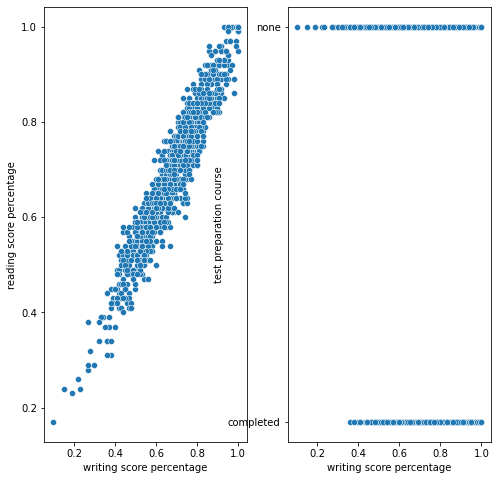

In [207]:
plt.subplot(1,2,1)
sns.scatterplot(x=df['writing score percentage'], y=df['reading score percentage'])

(plt.subplot(1,2,2))
sns.scatterplot(x=df['writing score percentage'], y=df['test preparation course'])


<h1>How well can the population read? (25 pts)</h1>
<ul>
<li>The test designers tell us that a score over 55% on the reading test is a good cutoff for being functionally literate. Given that, what percentage of test takers qualify as literate? (5 pts)
<li>Assume that the test score results on this test reasonably represents the population. What is the expected mean score for the population at large, and what is the range in which you are 92% confident the population mean lies in? (15 pts)
<li>Please demonstrate your 92% confidence from above in a graphical format (5pts)
</ul>

In [73]:
df_reading = df[df['reading score percentage']>0.55]
percent_lit = round((len(df_reading) / len(df['reading score percentage']))*100,2)

print('The percentage of test takers that qualify as literate is '+ str(percent_lit) + '%')

The percentage of test takers that qualify as literate is 82.4%


In [212]:
def simulateNormal(mu=0, sigma=1, n=100, m=10000, ciLow=4, ciHi=96) :
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi)
    muList = [mu] * m
    stderr = mean_squared_error(means, muList, squared=False)
    return cdf, ci, stderr

The mean score for the population at large with 92% confidnence interval is 69.16900000000004%


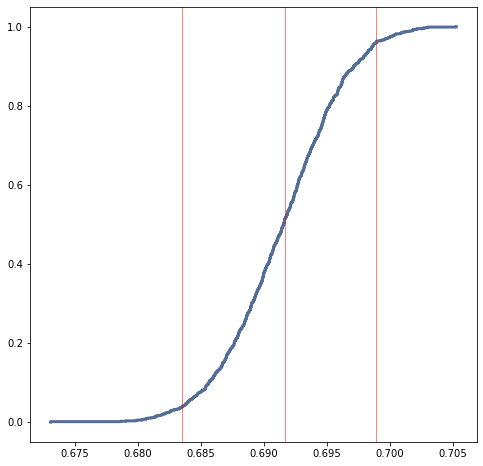

In [221]:
mu = df["reading score percentage"].mean()
sigma = df["reading score percentage"].std()
n = df["reading score percentage"].count()

cdf, ci, stderr = simulateNormal(mu=mu, sigma=sigma, n=n, m=1000, ciLow=4, ciHi=96)
print("The mean score for the population at large with 92% confidnence interval is "+ str(mu*100) + "%")
thinkplot.Cdf(cdf)
thinkplot.axvline(ci[0], color="red")
thinkplot.axvline(mu, color="red")
thinkplot.axvline(ci[1], color="red")
thinkplot.Config()

<h1>What are the odds...(10 pts)</h1>

M&M's are small candy-coated chocolates that come in a variety of colors.  
Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M's.  

* In 1994, the color mix in a bag of plain M&M's was 30\% Brown, 20\% Yellow, 20\% Red, 10\% Green, 10\% Orange, 10\% Tan.  

* In 1996, it was 24\% Blue , 20\% Green, 16\% Orange, 14\% Yellow, 13\% Red, 13\% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me
that one is from 1994 and one from 1996.  He won't tell me which is
which, but he gives me one M&M from each bag.  One is yellow and
one is green.  What is the probability that the yellow one came
from the 1994 bag?

Hint: The trick to this question is to define the hypotheses and the data carefully.

In [230]:
#Yellow Probablility Stats
prior = 0.5
lhood94 = 0.20
lhood96 = 0.14

unnorm94, unnorm96 = (prior*lhood94), (prior*lhood96)
post94, post96 = (unnorm94/(unnorm94+unnorm96)), (unnorm96/(unnorm94+unnorm96))

print("The probability that the yellow one came from the 1994 bag is " + str(round(post94,2)))



The probability that the yellow one came from the 1994 bag is 0.59


<h1>911 Calls (10pts)</h1>
<ul>
<li>For this data, what is the mean time in between 911 calls. (Note: this will require some manipulation of data - Google "pandas date" and "date difference in minutes" as a starting point. It is not super complex, apx 2-4 lines or so) (5pts)
<li>What is a good distribution to model this? (5pts)
</ul>

In [20]:
#read file - Don't change this part. 
calls = ""
with ZipFile('911_2.csv.zip') as myzip:
    with myzip.open('911_2.csv') as myfile:
       calls = pd.read_csv(myfile)
calls.head()

,zip,title,timeStamp,twp
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10,NEW HANOVER
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29,HATFIELD TOWNSHIP
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39,NORRISTOWN
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47,NORRISTOWN
4,NaN,EMS: DIZZINESS,2015-12-10 16:56,LOWER POTTSGROVE


In [50]:
from datetime import datetime
df_sorted = calls.sort_values('timeStamp')

tStamp = pd.to_datetime(df_sorted['timeStamp'])
df_time = tStamp.diff()
meancall = df_time.mean()

print("The mean time in between the calls is "+str(meancall)+" minutes.")

The mean time in between the calls is 0 days 00:03:40.427507192 minutes.


We can see that based on the diffrence on time stamp of the calls, the mean is the largest and mode is the smallest out of the three. This means that the data is skewed to the right so a right-skewed distribution would best fit the model.

In [115]:
c_mean, c_median, c_mode = df_time.mean(), df_time.median(), df_time.mode()
print(c_mean, c_median, c_mode)

0 days 00:03:40.427507192 0 days 00:02:00 0   0 days 00:01:00
dtype: timedelta64[ns]
